In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Executive Summary**

# **Business Recommendations**

For this project, I was asked to come up with a model to predict total sales of the Superkart stores for the subsequent quarter.

The model below is suitable to predict the total sales next quarter.

The model explains around 83% of the variation in the data.

The ranked order in total sales in OUT004, OUT003, OUT001, and lastly OUT002.

OUT004 - is the top performer with room to grow as it is a medium size.  The location may be key.   Fruit and Vegetable and snacks are major drivers and are indicative of higher socio-economic status as educated take health into consideration when shopping.

OUT001 - The worst performer is a food mart but that is likely because of size relative to its counterparts.

Daily needs like fruit and vegetables and snack foods are the biggest contributors to the revenue across all the stores. What is well known is the losses incurred for fresh produce. Superkart should consider researching methods to extend shelf life, for example: temperature, airflow, and ethylene are critical variables for shelf life.  Storage and supply chain logistics should be considering this.

# **To gain better insights -**

We are still missing a lot of the "WHY".  Our model performs well, and we can see the importance of fruit and vegetables, but we can only infer as to why certain tiers and demographics purchase in such ways.  Surveys are a great approach to understand the "WHY".  From the surveys, we can further target and enhance business units that are struggling.

Lastly, if there was a local festival in the quarter analyzed, taking place in the same locale as OUT004, like a major conncert over many days, then that could explain the "WHY".  Or, if natural disasters happened and people were evacuated to the locale of the top performing market, then that should be considered.  Hence, complementary data to the parameters provided could enhance the value of the interogation and increase the potential to grow business.

# **Problem Statement - SuperKart Sales Prediction**

**Objective:**

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

**Data Description:**

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
Product_Weight - the weight of each product
Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
Product_MRP - maximum retail price of each product
Store_Id - unique identifier of each store
Store_Establishment_Year - the year in which the store was established
Store_Size - the size of the store depending on sq. feet like high, medium, and low
Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store


In [ ]:
import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects for Resume/SuperKart.csv')
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
df['Product_Id'].nunique() # returns unique number of products

8763

In [ ]:
df.shape


(8763, 12)

In [ ]:
df.sample(10)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
7349,FD6502,10.33,Regular,0.032,Snack Foods,159.28,OUT004,2009,Medium,Tier 2,Supermarket Type2,3178.88
8239,FD1070,13.13,Regular,0.022,Dairy,138.97,OUT004,2009,Medium,Tier 2,Supermarket Type2,3395.52
23,FD4186,11.67,Low Sugar,0.118,Canned,179.54,OUT004,2009,Medium,Tier 2,Supermarket Type2,3895.80
8445,NC2250,11.28,No Sugar,0.118,Household,167.68,OUT004,2009,Medium,Tier 2,Supermarket Type2,3566.01
6570,FD7192,12.81,Low Sugar,0.144,Dairy,166.58,OUT004,2009,Medium,Tier 2,Supermarket Type2,3887.95
4321,FD7242,15.01,Low Sugar,0.064,Fruits and Vegetables,191.21,OUT001,1987,High,Tier 2,Supermarket Type1,4889.95
4588,FD5647,10.86,Regular,0.033,Breads,138.43,OUT004,2009,Medium,Tier 2,Supermarket Type2,2872.01
5744,FD1720,11.68,Low Sugar,0.053,Baking Goods,141.24,OUT004,2009,Medium,Tier 2,Supermarket Type2,3113.92
2975,NC1936,10.07,No Sugar,0.016,Household,136.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,2654.19
1705,FD2879,12.37,Regular,0.083,Fruits and Vegetables,166.94,OUT004,2009,Medium,Tier 2,Supermarket Type2,3796.12


In [ ]:
df['Product_Weight'].mean()

12.653792080337787

In [ ]:
df['Product_Sugar_Content'].value_counts() # returns the number of each value within column

Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64

In [ ]:
df['Product_Type'].value_counts() #returns countsof each product type

Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64

In [ ]:
df['Store_Id'].value_counts() #returns counts of each store id

OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: Store_Id, dtype: int64

In [ ]:
df['Store_Type'].value_counts() #returns counts of each store type

Supermarket Type2     4676
Supermarket Type1     1586
Departmental Store    1349
Food Mart             1152
Name: Store_Type, dtype: int64

In [ ]:
df.info() #overview of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
df.describe(include = 'all') #exploring the data set

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
count,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763.000000,8763,8763,8763,8763.000000
unique,8763,NaN,4,NaN,16,NaN,4,NaN,3,3,4,NaN
top,FD6114,NaN,Low Sugar,NaN,Fruits and Vegetables,NaN,OUT004,NaN,Medium,Tier 2,Supermarket Type2,NaN
freq,1,NaN,4885,NaN,1249,NaN,4676,NaN,6025,6262,4676,NaN
mean,NaN,12.653792,NaN,0.068786,NaN,147.032539,NaN,2002.032751,NaN,NaN,NaN,3464.003640
std,NaN,2.217320,NaN,0.048204,NaN,30.694110,NaN,8.388381,NaN,NaN,NaN,1065.630494
min,NaN,4.000000,NaN,0.004000,NaN,31.000000,NaN,1987.000000,NaN,NaN,NaN,33.000000
25%,NaN,11.150000,NaN,0.031000,NaN,126.160000,NaN,1998.000000,NaN,NaN,NaN,2761.715000
50%,NaN,12.660000,NaN,0.056000,NaN,146.740000,NaN,2009.000000,NaN,NaN,NaN,3452.340000
75%,NaN,14.180000,NaN,0.096000,NaN,167.585000,NaN,2009.000000,NaN,NaN,NaN,4145.165000


In [ ]:
df['Product_Sugar_Content'].replace('reg', 'regular')

0       Low Sugar
1       Low Sugar
2         Regular
3       Low Sugar
4        No Sugar
          ...    
8758     No Sugar
8759     No Sugar
8760     No Sugar
8761     No Sugar
8762    Low Sugar
Name: Product_Sugar_Content, Length: 8763, dtype: object

In [ ]:
# find null values
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Product_Id  Product_Weight  Product_Sugar_Content  \
0          False           False                  False   
1          False           False                  False   
2          False           False                  False   
3          False           False                  False   
4          False           False                  False   
...          ...             ...                    ...   
8758       False           False                  False   
8759       False           False                  False   
8760       False           False                  False   
8761       False           False                  False   
8762       False           False                  False   

      Product_Allocated_Area  Product_Type  Product_MRP  Store_Id  \
0                      False         False        False     False   
1                      False         False        False     False   
2                     

In [ ]:
df.duplicated() #duplicated returns boolean to show which rows are duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
8758    False
8759    False
8760    False
8761    False
8762    False
Length: 8763, dtype: bool

In [ ]:
df['Product_Sugar_Content'].value_counts()

Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64

In [ ]:
df['Product_Id'].nunique()

8763

In [ ]:
df['Product_Id'].str[:2].value_counts() #returns counts of the alpha text in the product id

FD    6539
NC    1519
DR     705
Name: Product_Id, dtype: int64

In [ ]:
df['Product_Id'] = df['Product_Id'].str[:2] # as each product id is unique, the classification is by alpha script, thus segmenting for analysis

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

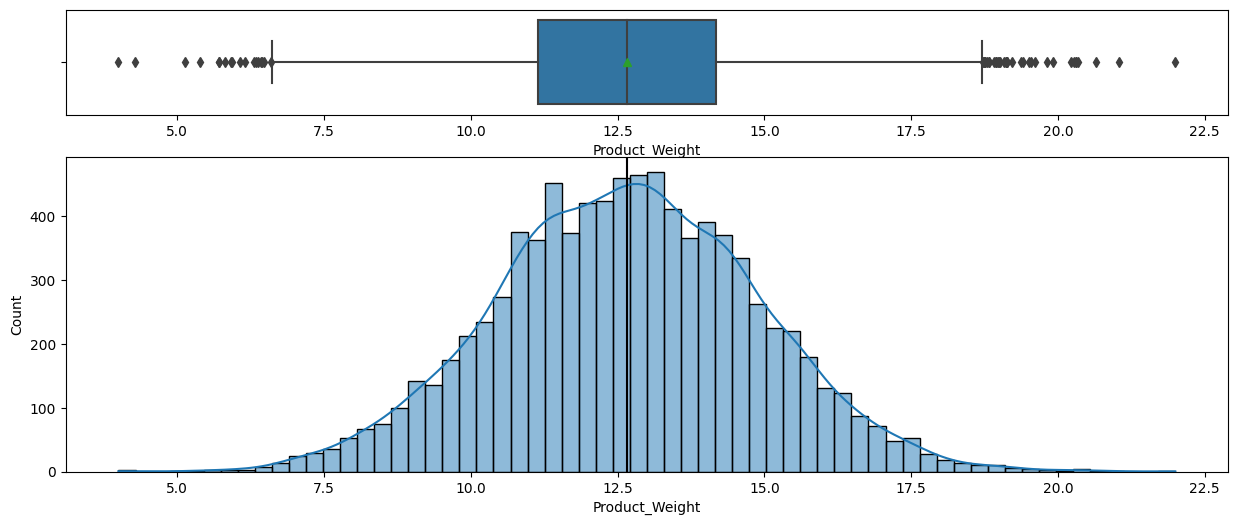

In [ ]:
# sns.boxplot(data = df,x ='Product_Weight')
# sns.histplot(data = df,x ='Product_Weight', kde = True)

fig, ax = plt.subplots(2,1, figsize = (15,6), gridspec_kw = {'height_ratios': (1,3)})
sns.boxplot(data = df, x = 'Product_Weight', showmeans = True, ax = ax[0])
sns.histplot(data = df, x = 'Product_Weight', ax = ax[1], kde = True)
ax[1].axvline(df['Product_Weight'].mean(), linestyle = '--', color = 'violet')
ax[1].axvline(df['Product_Weight'].median(), linestyle = '-', color = 'black')

linear regression works best when data distributed normally.... the above is reassuring

In [ ]:
def histogram_boxplot(data, feature, figsize = (12,7), kde = False, bins = None):
    """
    #Boxplot and histogram combined

#data: DataFrame
#feature: dataframe column
#figuresize: size of figure (default (12, 7))
#kde : whether to show density curve (default False)
#bins : number of bins for histogram (default None)
"""
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2, #number of rows in subplot grid  = 2
        sharex = True, #x-axis will be shared among all subplots
        gridspec_kw = {'height_ratios': (0.25, 0.75)},
        figsize = figsize,
    )
                         #creating the two subplots
    sns.boxplot(
    data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                          #boxplot created with a stgar to indicate the value of the column
    sns.histplot(
    data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                       # for histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                        # add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )             # add mean to the histogram

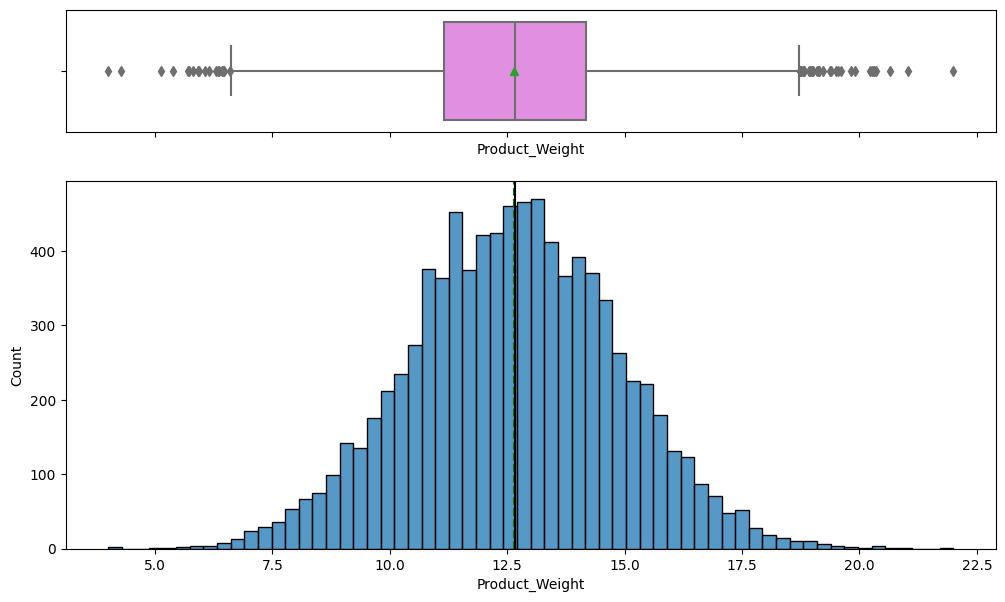

In [ ]:
histogram_boxplot(df, 'Product_Weight')

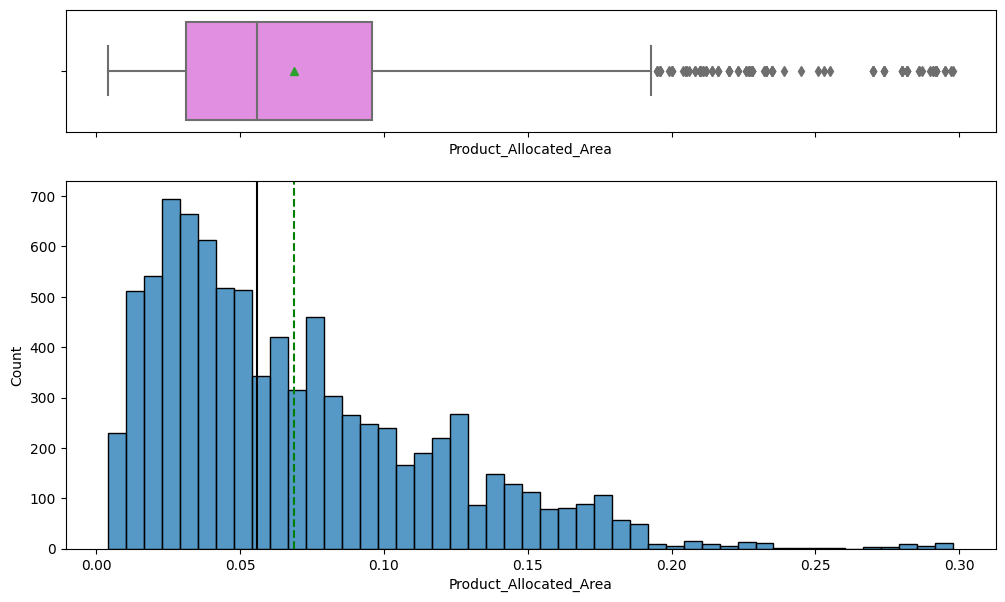

In [ ]:
histogram_boxplot(df, 'Product_Allocated_Area')

<Axes: xlabel='Product_Allocated_Area', ylabel='Count'>

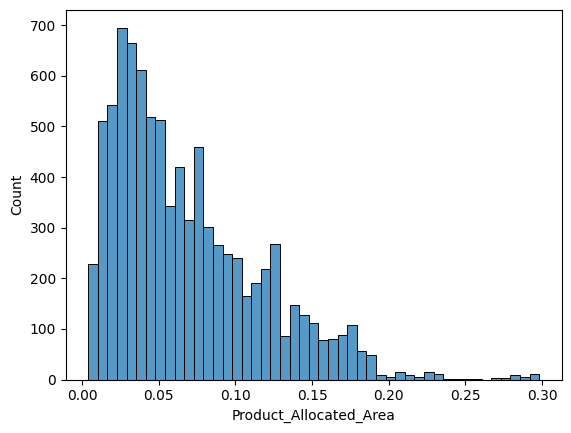

In [ ]:
sns.histplot(df['Product_Allocated_Area'])

<Axes: xlabel='Product_Allocated_Area', ylabel='Count'>

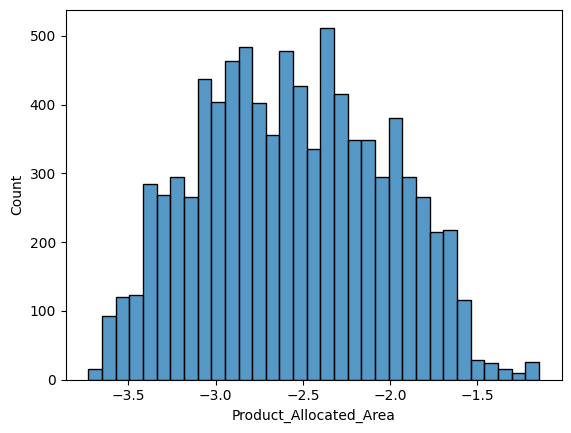

In [ ]:
sns.histplot(np.log(df['Product_Allocated_Area'] + .02))

# the abov e log transformation may improve the regression but will continue without the log transformation

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


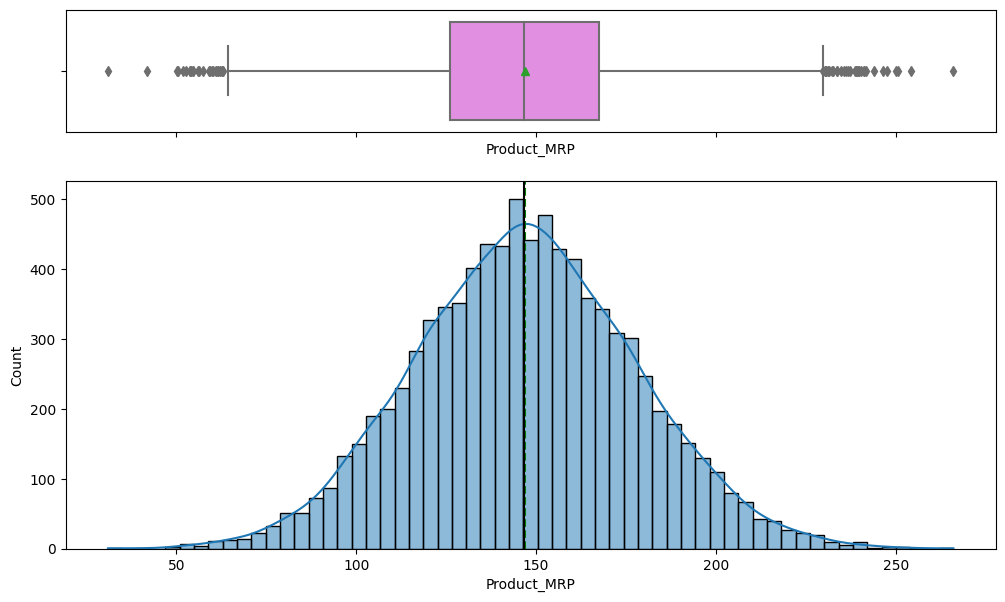

In [ ]:
histogram_boxplot(df,"Product_MRP", kde = True)

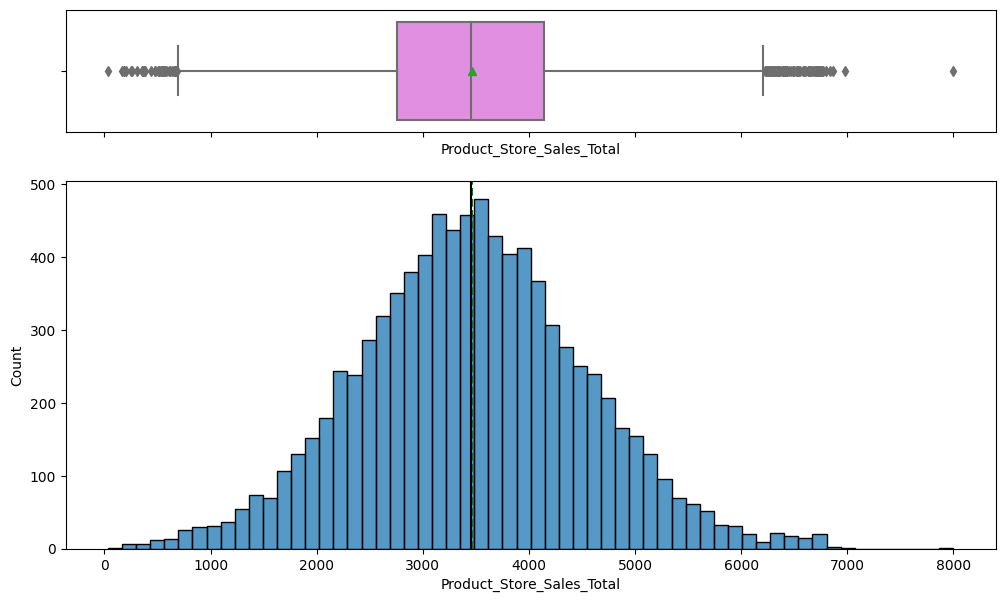

In [ ]:
histogram_boxplot(df,'Product_Store_Sales_Total')

In [ ]:
df['Store_Establishment_Year'].value_counts()

2009    4676
1987    1586
1999    1349
1998    1152
Name: Store_Establishment_Year, dtype: int64

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02


Text(1, 4000, 'TEST')

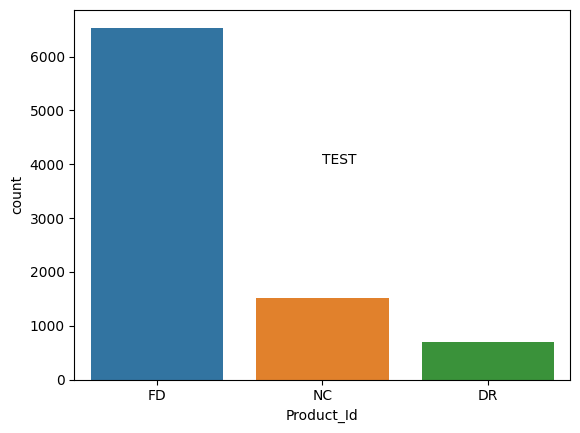

In [ ]:
ax = sns.countplot(data = df, x = 'Product_Id')
ax.annotate('TEST',(1,4000))

In [ ]:
ax.patches[0].get_height() #retunrs the number of rows associated with each

6539.0

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

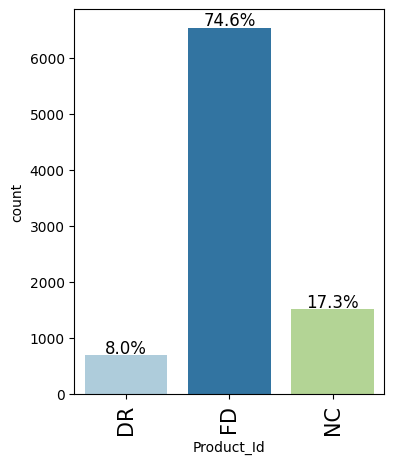

In [ ]:
labeled_barplot(df, 'Product_Id', perc = True)

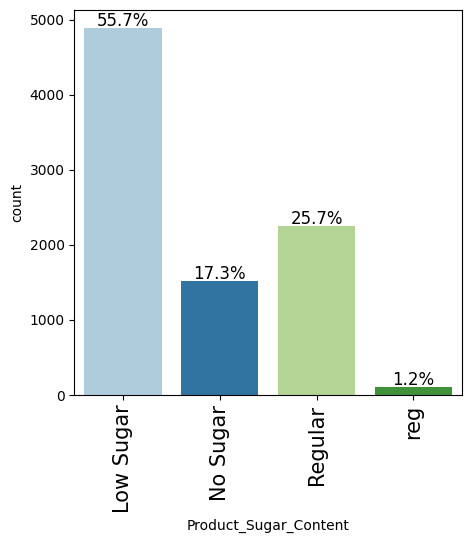

In [ ]:
labeled_barplot(df, 'Product_Sugar_Content', perc = True)

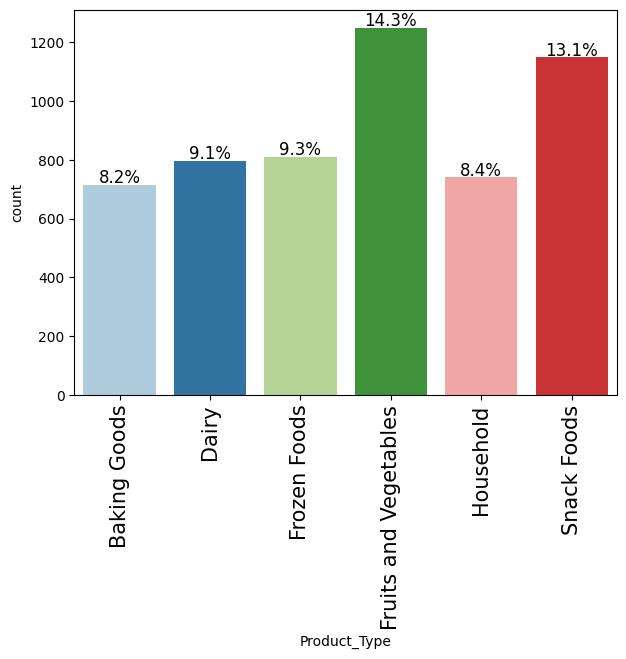

In [ ]:
labeled_barplot(df, 'Product_Type', n = 6, perc = True)

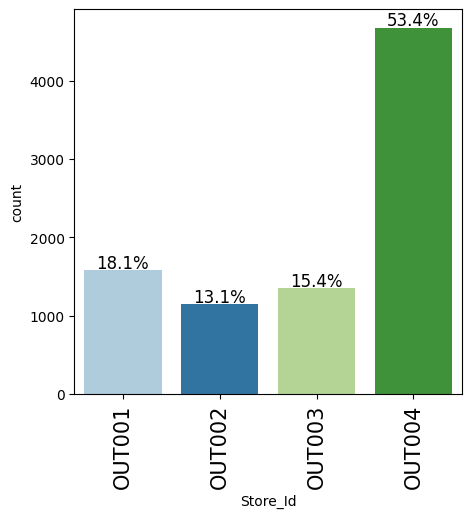

In [ ]:
labeled_barplot(df, 'Store_Id', perc = True)

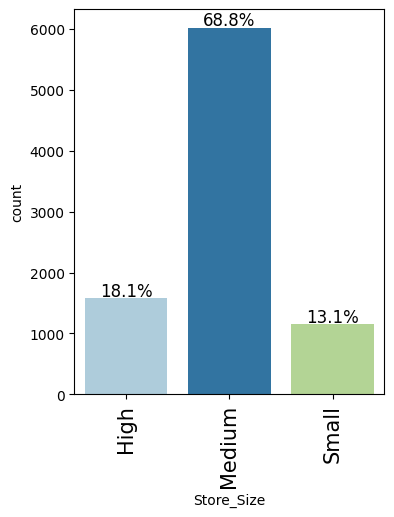

In [ ]:
labeled_barplot(df, 'Store_Size', perc = True)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02


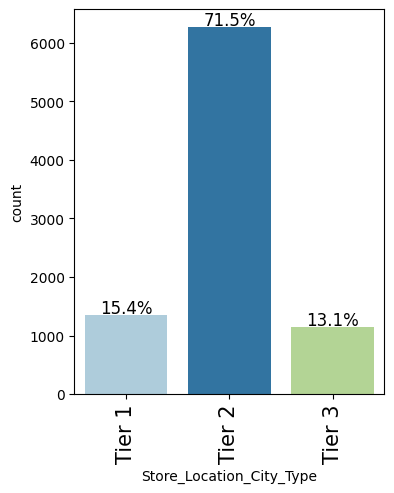

In [ ]:
labeled_barplot(df, 'Store_Location_City_Type', perc = True)

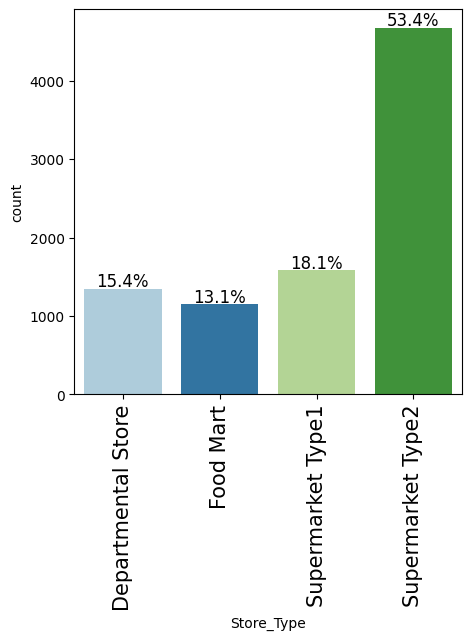

In [ ]:
labeled_barplot(df, 'Store_Type', perc = True)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02


<ipython-input-48-581aaf02463d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'viridis') # looks at numerical features in symegtric matrix


<Axes: >

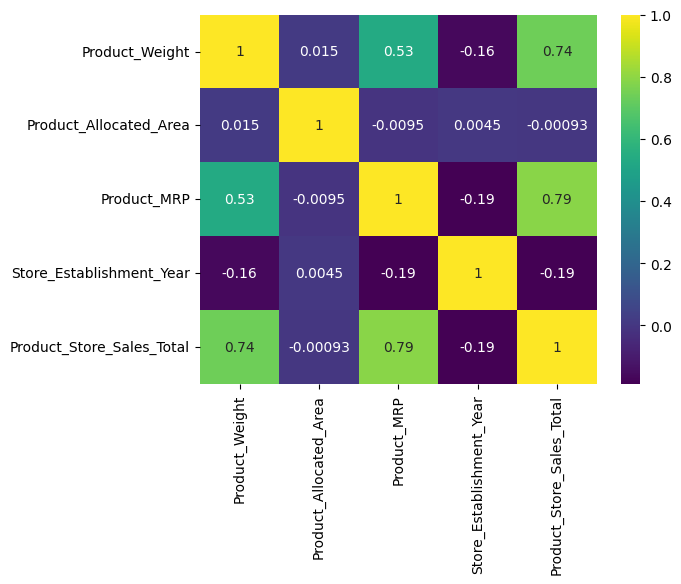

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis') # looks at numerical features in symegtric matrix

In [ ]:
df_revenue = df.groupby(['Product_Id'], as_index = False)['Product_Store_Sales_Total'].sum()

<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

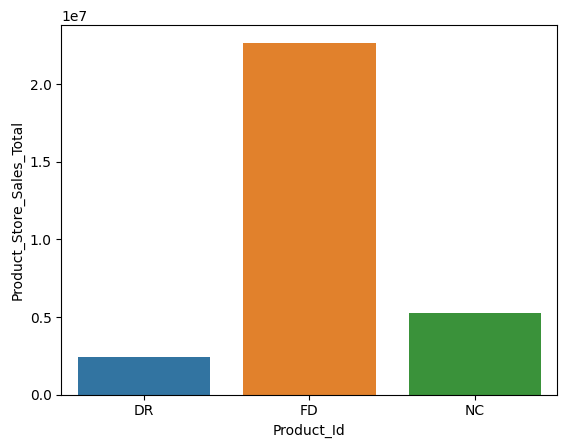

In [ ]:
sns.barplot(data = df_revenue, x = 'Product_Id', y = 'Product_Store_Sales_Total')

<ipython-input-51-7069c13879d1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Product_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)


<Axes: xlabel='Product_Id', ylabel='Product_Store_Sales_Total'>

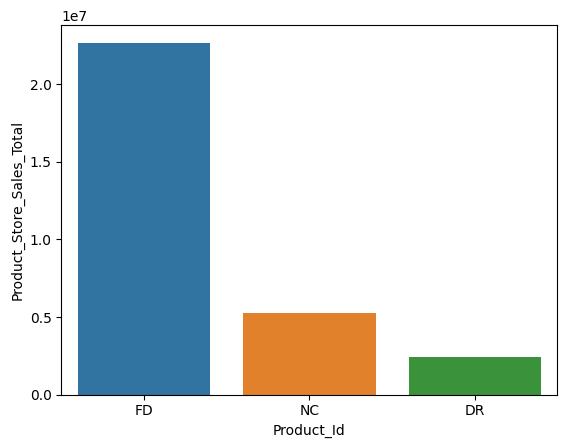

In [ ]:
sns.barplot(data = df, x = 'Product_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02


<ipython-input-53-2d973925e198>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)


<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

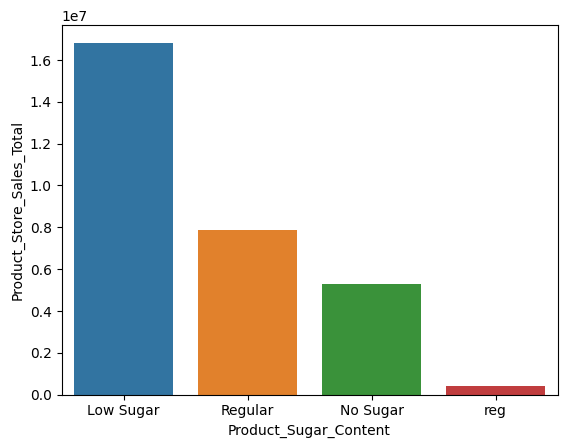

In [ ]:
sns.barplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)

<ipython-input-54-f6a72ec01011>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

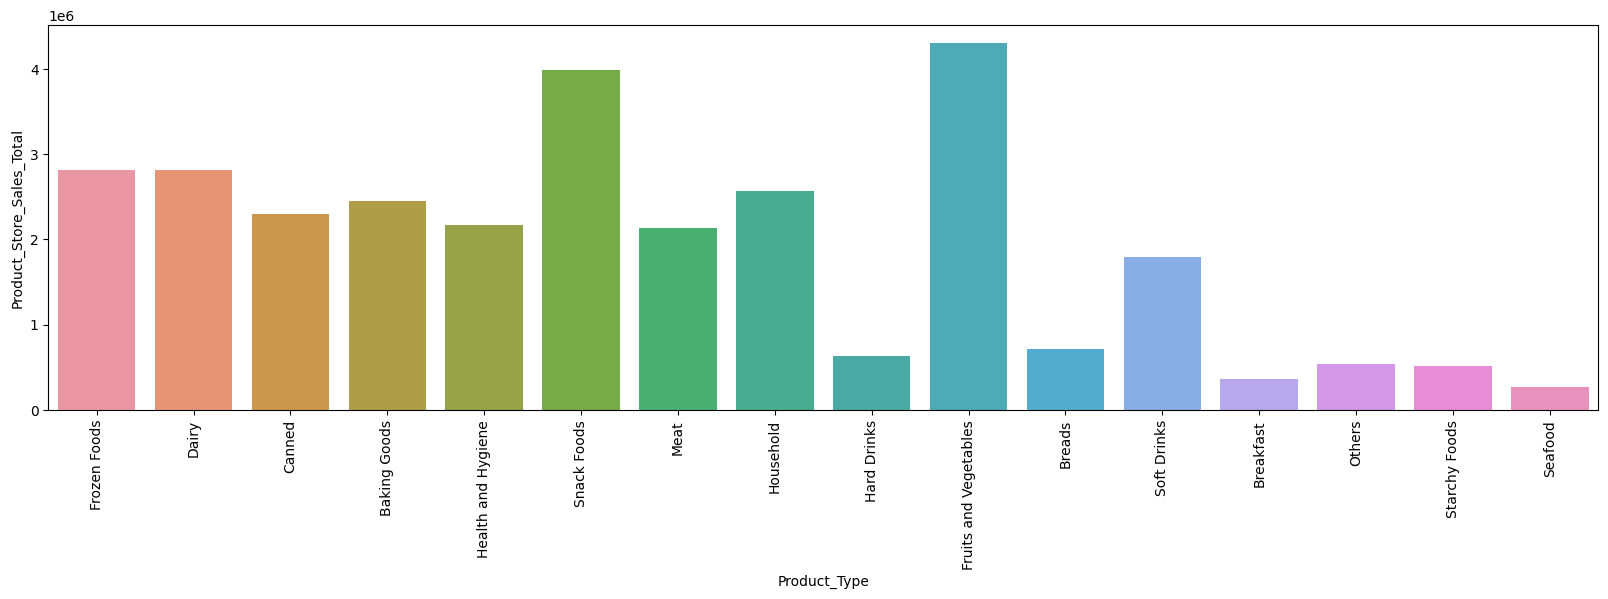

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(data = df, x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)
plt.xticks (rotation = 90)

<ipython-input-55-e5c7f017590a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Store_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'OUT004'),
  Text(1, 0, 'OUT003'),
  Text(2, 0, 'OUT001'),
  Text(3, 0, 'OUT002')])

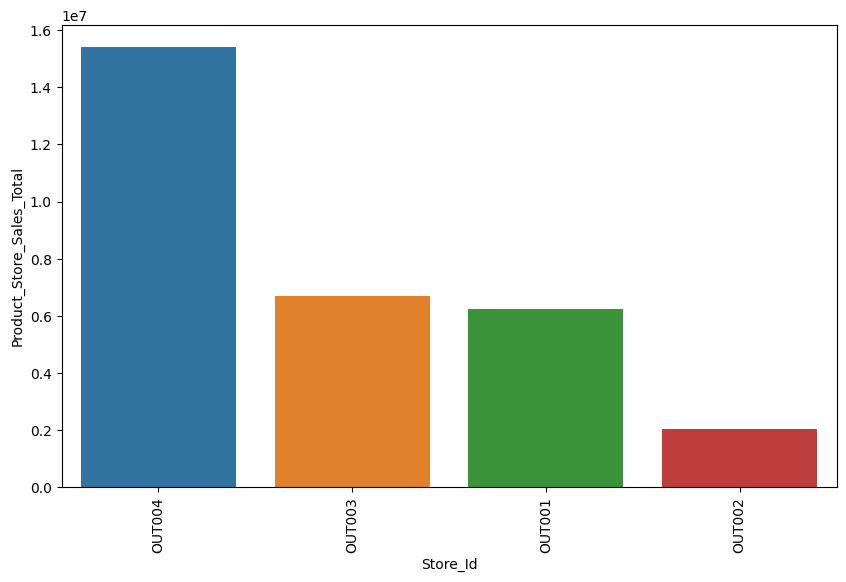

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Store_Id', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)
plt.xticks (rotation = 90)

<ipython-input-56-582f45390157>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Store_Size', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)


(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

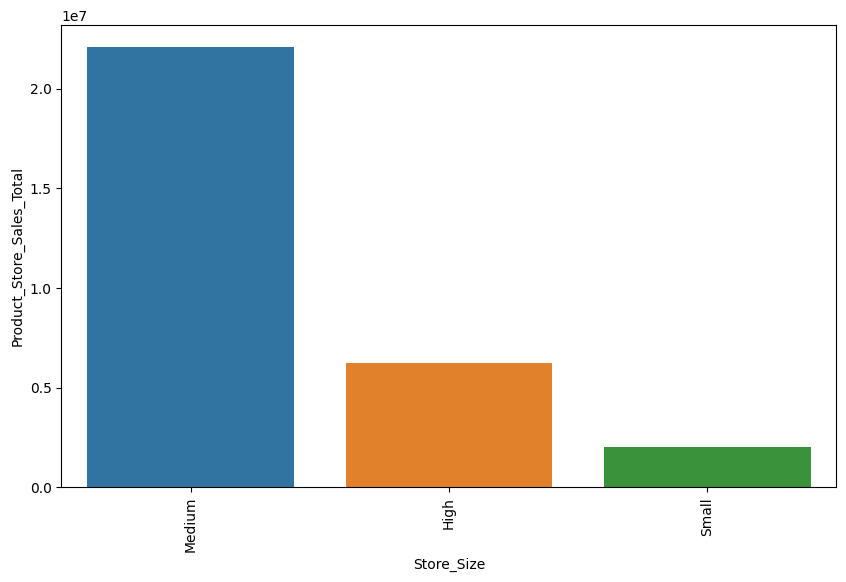

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Store_Size', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)
plt.xticks (rotation = 90)

<ipython-input-57-fe5176073982>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Store_Location_City_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)


(array([0, 1, 2]),
 [Text(0, 0, 'Tier 2'), Text(1, 0, 'Tier 1'), Text(2, 0, 'Tier 3')])

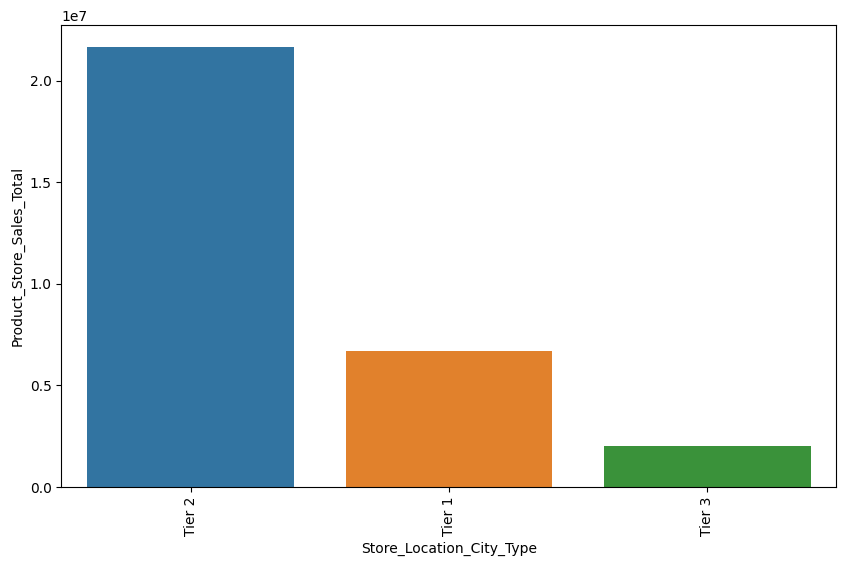

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Store_Location_City_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)
plt.xticks (rotation = 90)

<ipython-input-58-944dab11102f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df, x = 'Store_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type2'),
  Text(1, 0, 'Departmental Store'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Food Mart')])

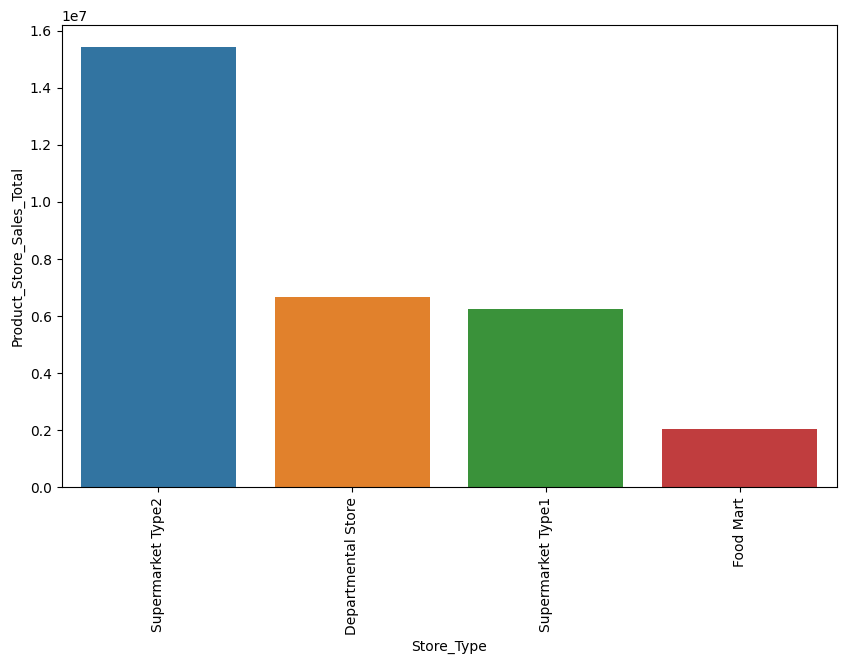

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Store_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci =1.0)
plt.xticks (rotation = 90)

<Axes: xlabel='Product_Sugar_Content', ylabel='Product_Store_Sales_Total'>

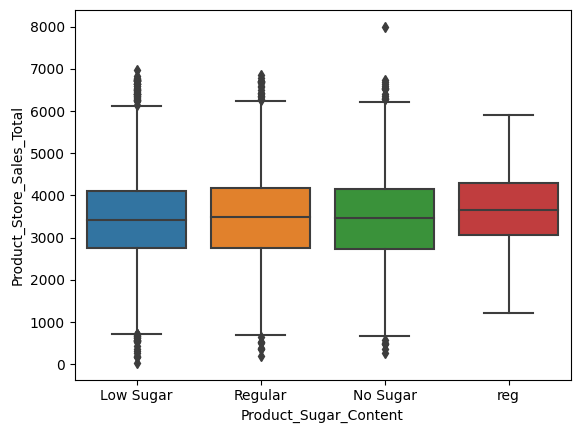

In [ ]:
sns.boxplot(data = df, x = 'Product_Sugar_Content', y = 'Product_Store_Sales_Total' )

<Axes: xlabel='Store_Size', ylabel='Product_Store_Sales_Total'>

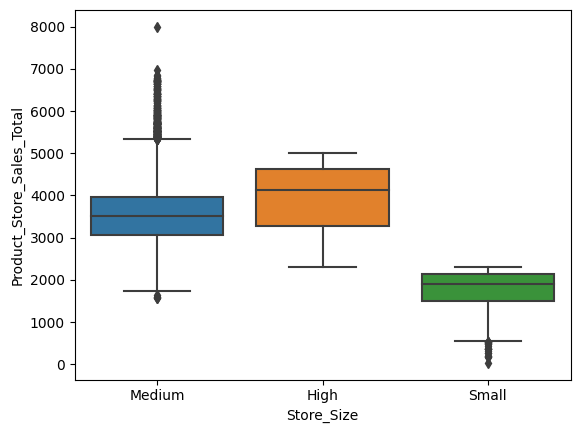

In [ ]:
sns.boxplot(data = df, x = 'Store_Size', y = 'Product_Store_Sales_Total')

<Axes: xlabel='Store_Id', ylabel='Product_Store_Sales_Total'>

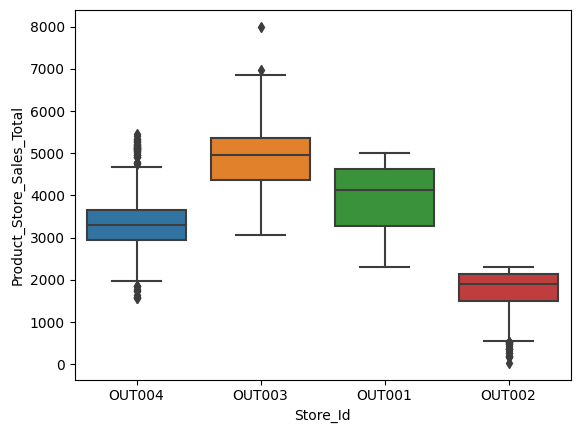

In [ ]:
sns.boxplot(data = df, x = 'Store_Id', y = 'Product_Store_Sales_Total')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Canned'),
  Text(3, 0, 'Baking Goods'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Meat'),
  Text(7, 0, 'Household'),
  Text(8, 0, 'Hard Drinks'),
  Text(9, 0, 'Fruits and Vegetables'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

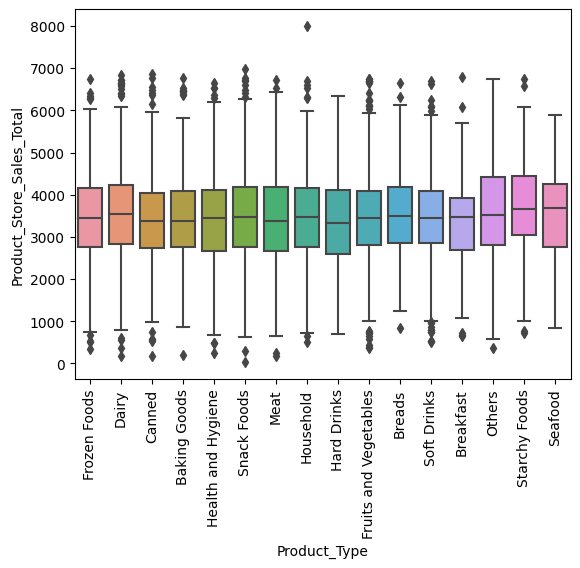

In [ ]:
sns.boxplot(data = df, x = 'Product_Type', y = 'Product_Store_Sales_Total')
plt.xticks(rotation = 90)

In [ ]:
df.groupby('Store_Id')['Product_Store_Sales_Total'].sum()

Store_Id
OUT001     6223113.18
OUT002     2030909.72
OUT003     6673457.57
OUT004    15427583.43
Name: Product_Store_Sales_Total, dtype: float64

<ipython-input-65-1c7bb2514353>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] == 'OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Canned'),
  Text(1, 0, 'Baking Goods'),
  Text(2, 0, 'Snack Foods'),
  Text(3, 0, 'Soft Drinks'),
  Text(4, 0, 'Meat'),
  Text(5, 0, 'Breakfast'),
  Text(6, 0, 'Frozen Foods'),
  Text(7, 0, 'Fruits and Vegetables'),
  Text(8, 0, 'Dairy'),
  Text(9, 0, 'Hard Drinks'),
  Text(10, 0, 'Starchy Foods'),
  Text(11, 0, 'Health and Hygiene'),
  Text(12, 0, 'Household'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Breads')])

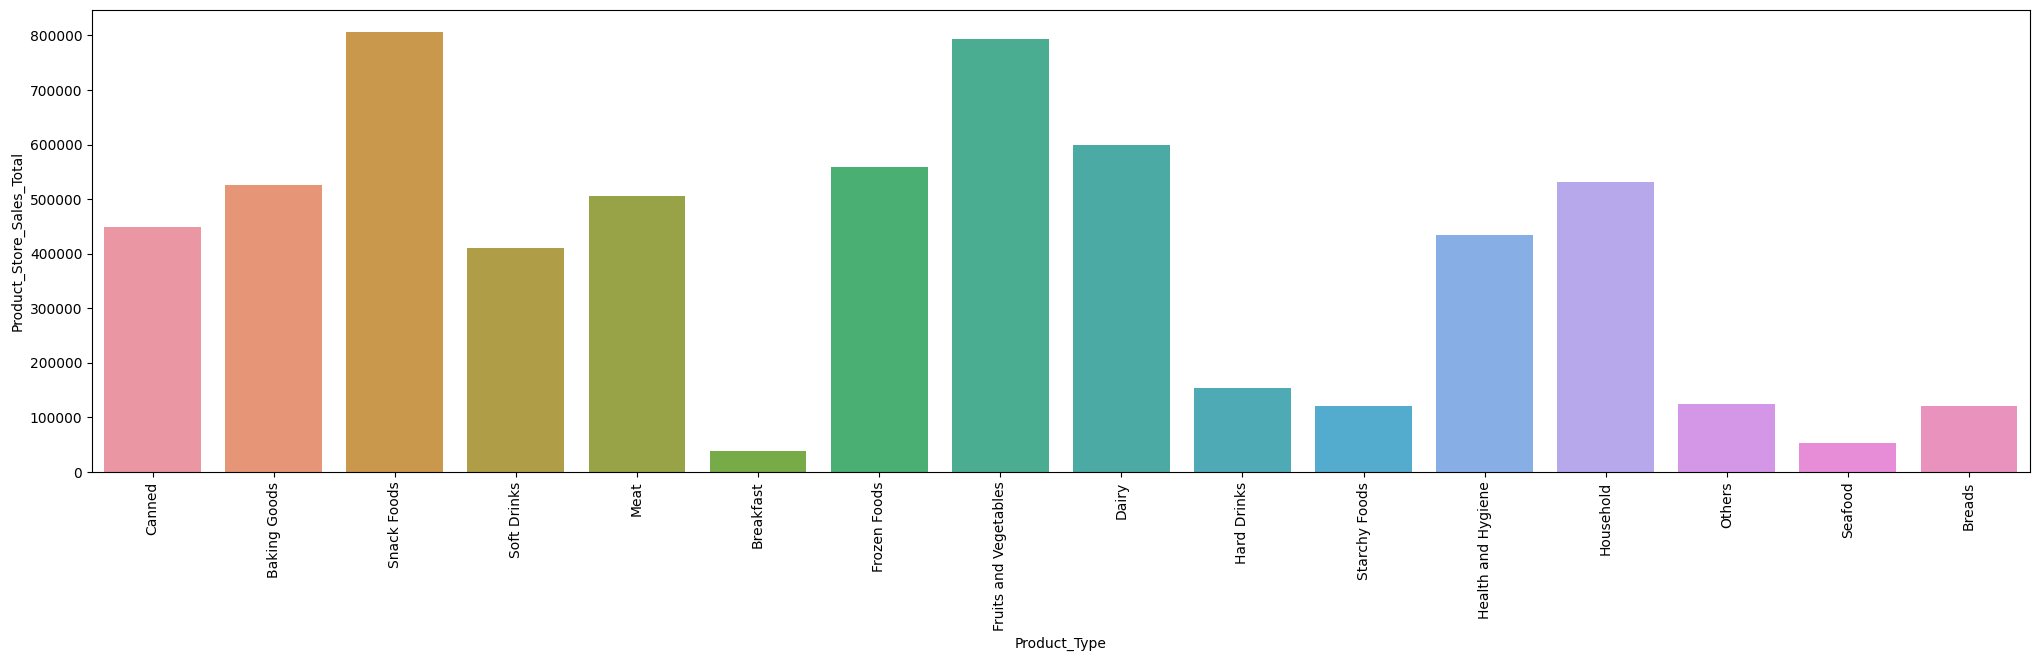

In [ ]:
plt.figure(figsize = (25,6))
sns.barplot(data = df[df['Store_Id'] == 'OUT001'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks (rotation = 90)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02


<ipython-input-67-ea28363cf337>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] == 'OUT002'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Health and Hygiene'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Meat'),
  Text(4, 0, 'Hard Drinks'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Starchy Foods'),
  Text(7, 0, 'Dairy'),
  Text(8, 0, 'Fruits and Vegetables'),
  Text(9, 0, 'Frozen Foods'),
  Text(10, 0, 'Seafood'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Baking Goods'),
  Text(13, 0, 'Others'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Breakfast')])

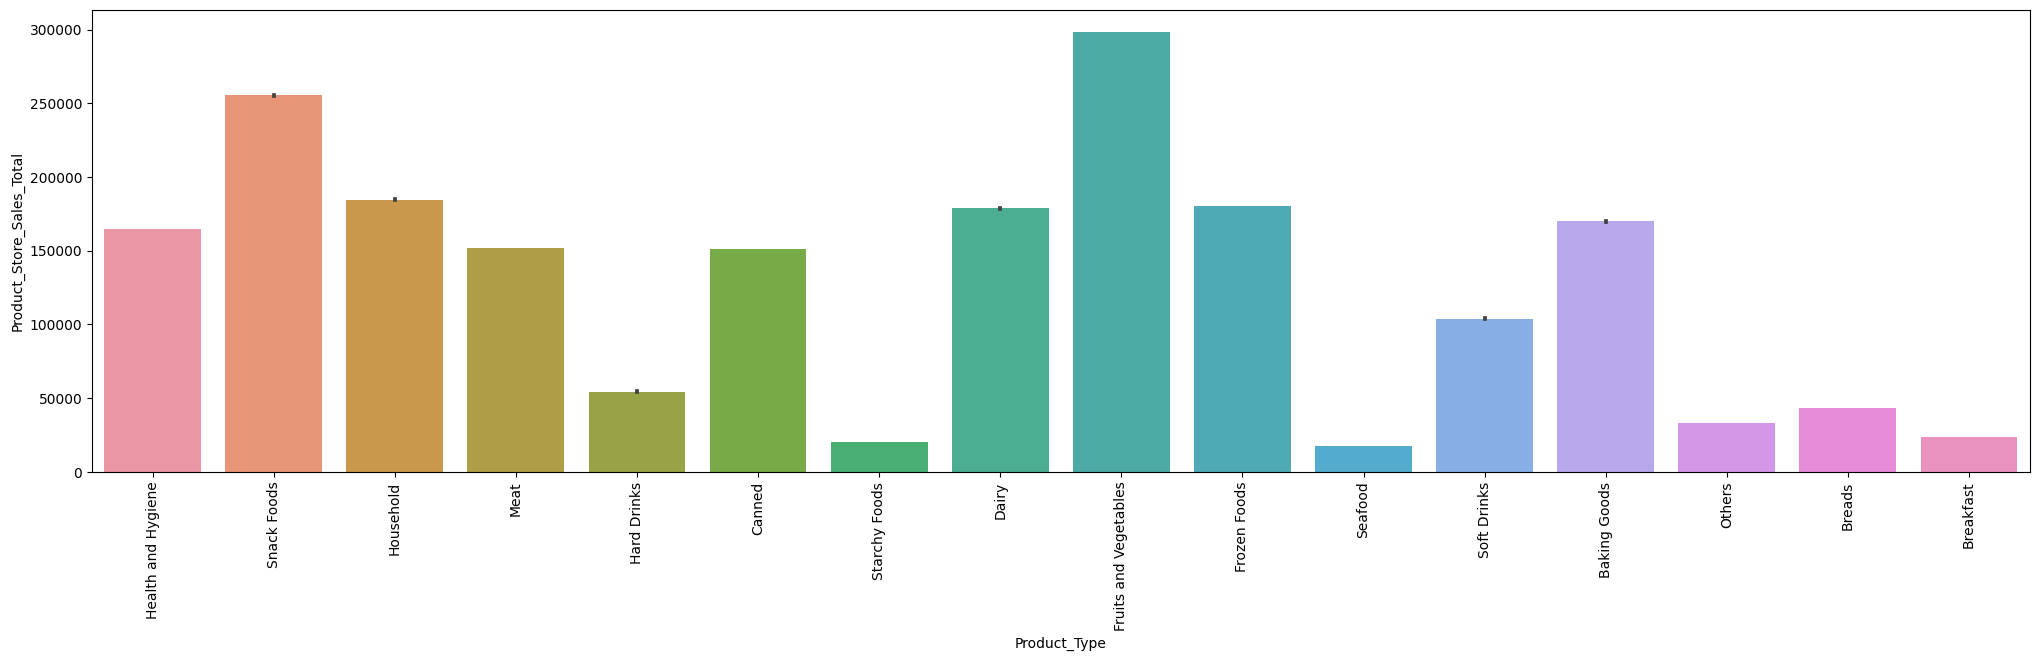

In [ ]:
plt.figure(figsize = (25,6))
sns.barplot(data = df[df['Store_Id'] == 'OUT002'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks (rotation = 90)

<ipython-input-71-74a0fb1a6575>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] == 'OUT003'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0 )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Meat'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Health and Hygiene'),
  Text(5, 0, 'Snack Foods'),
  Text(6, 0, 'Canned'),
  Text(7, 0, 'Soft Drinks'),
  Text(8, 0, 'Baking Goods'),
  Text(9, 0, 'Starchy Foods'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Breakfast'),
  Text(12, 0, 'Frozen Foods'),
  Text(13, 0, 'Seafood'),
  Text(14, 0, 'Breads'),
  Text(15, 0, 'Hard Drinks')])

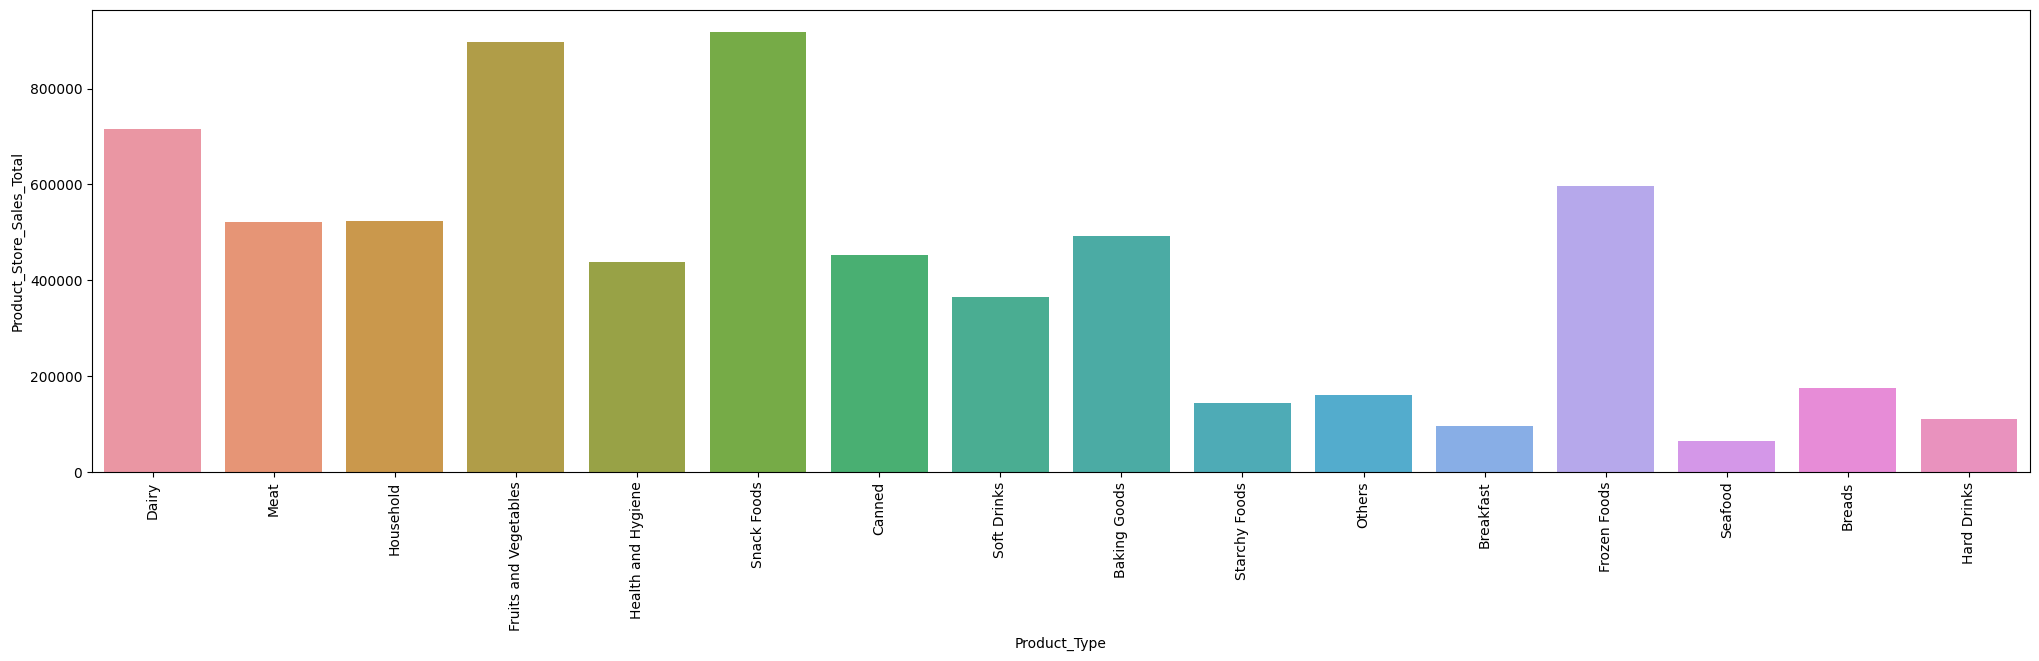

In [ ]:
plt.figure(figsize = (25,6))
sns.barplot(data = df[df['Store_Id'] == 'OUT003'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0 )
plt.xticks (rotation = 90)

<ipython-input-72-c974844466a9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1.0)` for the same effect.

  sns.barplot(data = df[df['Store_Id'] == 'OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Frozen Foods'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Health and Hygiene'),
  Text(3, 0, 'Hard Drinks'),
  Text(4, 0, 'Fruits and Vegetables'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Breads'),
  Text(8, 0, 'Household'),
  Text(9, 0, 'Dairy'),
  Text(10, 0, 'Breakfast'),
  Text(11, 0, 'Soft Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Meat'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Seafood')])

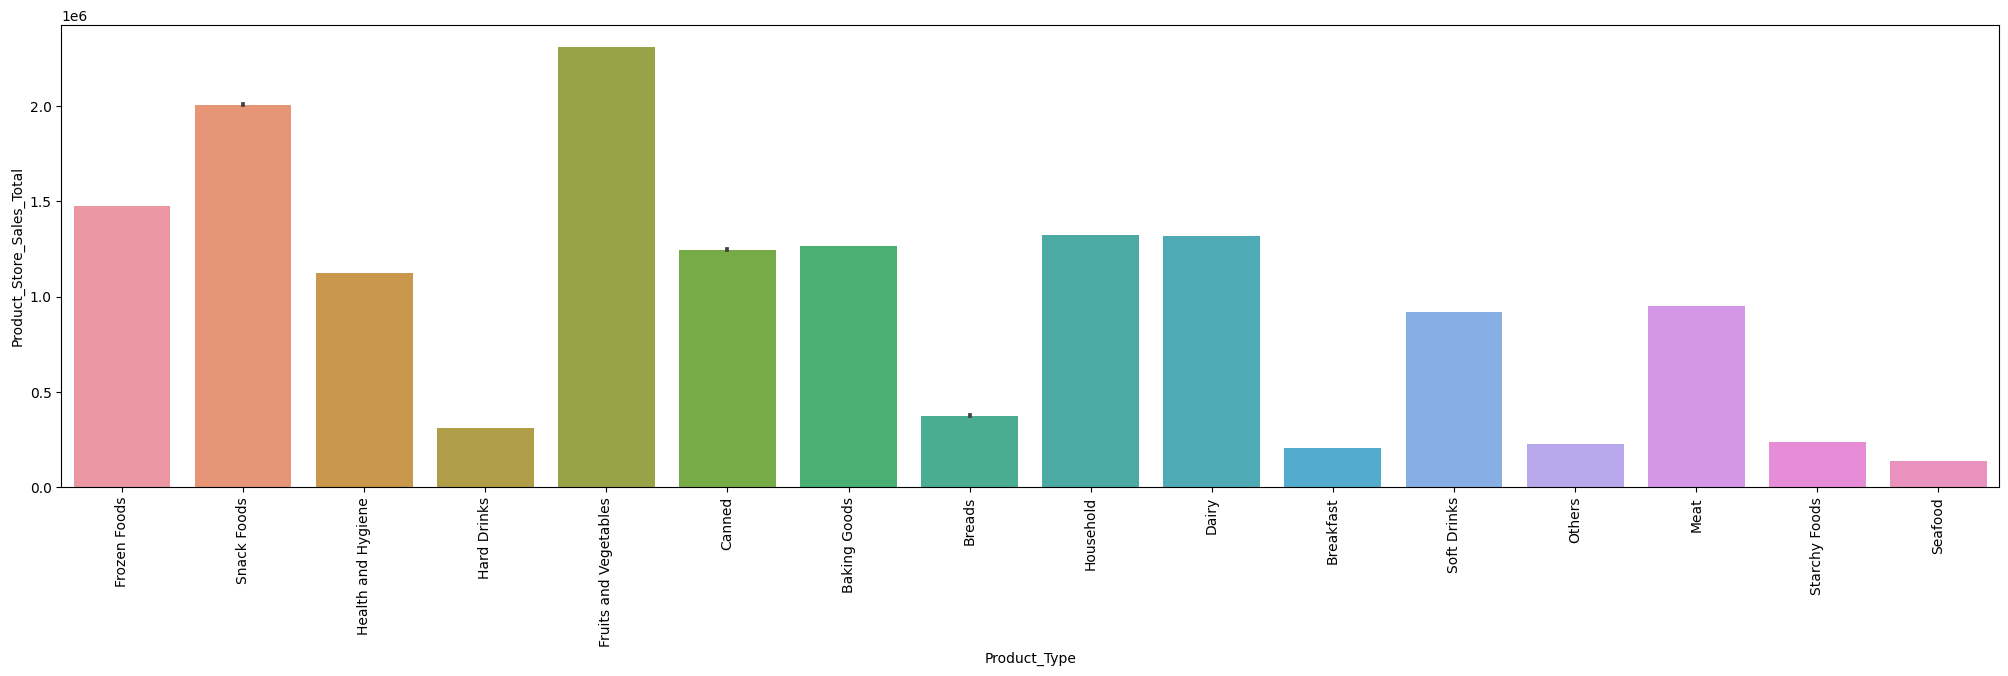

In [ ]:
plt.figure(figsize = (25,6))
sns.barplot(data = df[df['Store_Id'] == 'OUT004'], x = 'Product_Type', y = 'Product_Store_Sales_Total', estimator = np.sum, ci = 1.0)
plt.xticks (rotation = 90)

<Axes: xlabel='Product_Type', ylabel='Product_Sugar_Content'>

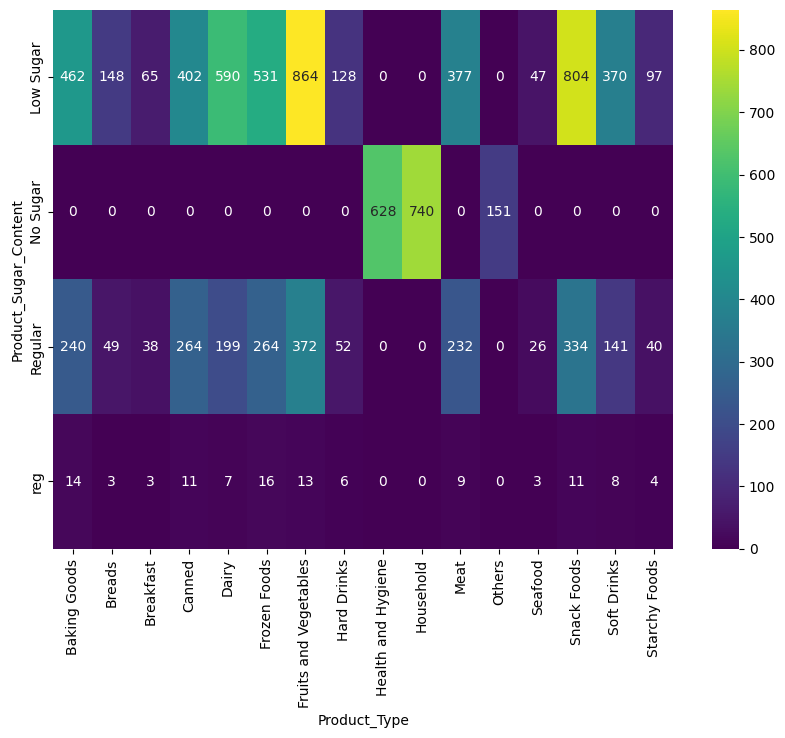

In [ ]:
# pandas cross tab for value counts among 2 categoricals with heatmap to visualize it
plt.figure(figsize = (10,7))
sns.heatmap(pd.crosstab(df['Product_Sugar_Content'], df['Product_Type']),
            annot = True,
            cmap = 'viridis',
            fmt = 'g')

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
df['Store_Age'] = 2023 - df['Store_Establishment_Year']

In [ ]:
df.drop(columns = ['Store_Establishment_Year'], axis = 0, inplace = True)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,14
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,24


In [ ]:
df['Product_Type'].value_counts().index.to_list()

['Fruits and Vegetables',
 'Snack Foods',
 'Frozen Foods',
 'Dairy',
 'Household',
 'Baking Goods',
 'Canned',
 'Health and Hygiene',
 'Meat',
 'Soft Drinks',
 'Breads',
 'Hard Drinks',
 'Others',
 'Starchy Foods',
 'Breakfast',
 'Seafood']

In [ ]:
Perishables = ['Fruits and Vegetables', 'Dairy', 'Meat', 'Breads','Breakfast', 'Seafood' ]

def product_type_perishable (X):

  if X in Perishables:
    return 'Perishable'
  else:
      return 'Non Perishable'

In [ ]:
df['Product_Type_Categories'] = df['Product_Type'].apply(product_type_perishable)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Type_Categories
0,FD,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,14,Non Perishable
1,FD,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,24,Perishable


In [ ]:
df['Product_Type_Categories'].value_counts(1)

Non Perishable    0.652516
Perishable        0.347484
Name: Product_Type_Categories, dtype: float64

In [ ]:
df.drop(columns = ['Product_Type'], axis = 0, inplace = True)

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Type_Categories
0,FD,12.66,Low Sugar,0.027,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,14,Non Perishable
1,FD,16.54,Low Sugar,0.144,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,24,Perishable


In [ ]:
num_cols = df.select_dtypes(include = np.number).columns.to_list()
num_cols

['Product_Weight',
 'Product_Allocated_Area',
 'Product_MRP',
 'Product_Store_Sales_Total',
 'Store_Age']

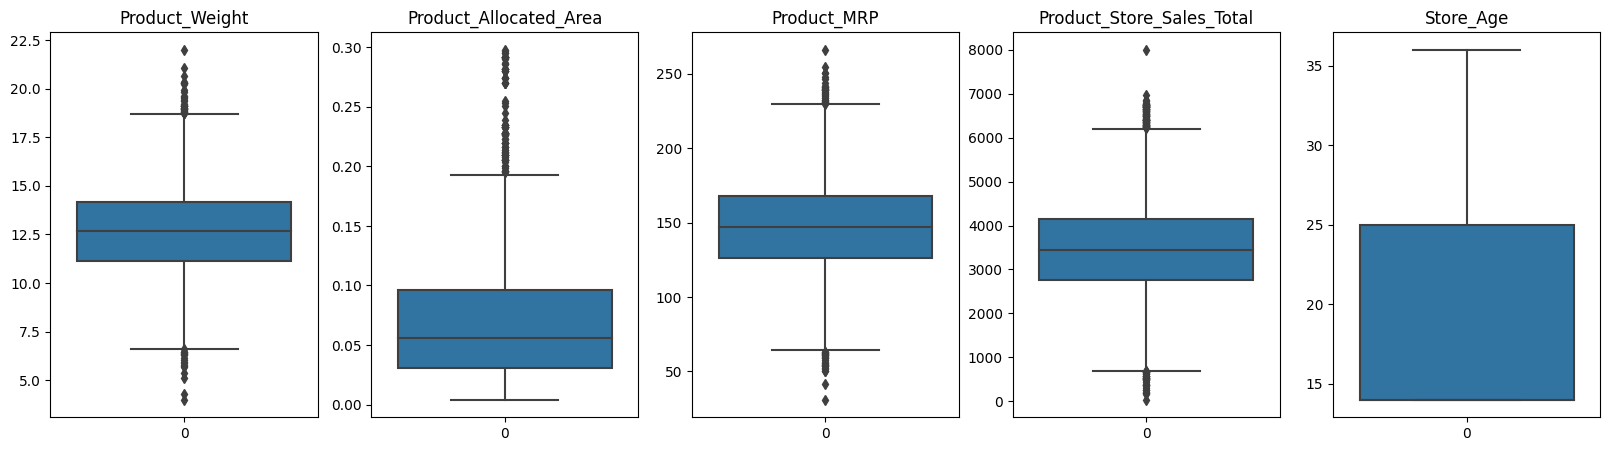

In [ ]:
fig, ax = plt.subplots(1,5, figsize = (20,5))

j = 0
for i in num_cols:

  sns.boxplot(df[i], ax = ax[j]).set(title = i)
  j += 1




In [ ]:
# split into train and test

In [ ]:
df.head(2)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Type_Categories
0,FD,12.66,Low Sugar,0.027,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,14,Non Perishable
1,FD,16.54,Low Sugar,0.144,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,24,Perishable


In [ ]:
# must perform a an ecndoing steam for object type variables
# Perfomr OHE (one hot encoding)

df_ohe = pd.get_dummies(df, columns = df.select_dtypes(include = ['object', 'category']).columns.to_list(),
               drop_first = True
              )

In [ ]:
df_ohe.head(2)

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Product_Sugar_Content_reg,...,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Type_Categories_Perishable
0,12.66,0.027,117.08,2842.40,14,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
1,16.54,0.144,171.43,4830.02,24,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [ ]:
df.select_dtypes(include = ['object', 'category']).columns.to_list()

['Product_Id',
 'Product_Sugar_Content',
 'Store_Id',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type',
 'Product_Type_Categories']

In [ ]:
X = df_ohe.drop ('Product_Store_Sales_Total', axis = 1)
y = df_ohe ['Product_Store_Sales_Total']

In [ ]:
X.shape


(8763, 20)

In [ ]:
y.shape

(8763,)

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X). # constant used to add bias to regresssion model

In [ ]:
X.head(5)


,const,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Product_Sugar_Content_reg,...,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Type_Categories_Perishable
0,1.0,12.66,0.027,117.08,14,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
1,1.0,16.54,0.144,171.43,24,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,1.0,14.28,0.031,162.08,36,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1.0,12.10,0.112,186.31,36,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1.0,9.57,0.010,123.67,25,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
X_train.shape

(6134, 21)

In [ ]:
X_test.shape

(2629, 21)

In [ ]:
y_test.shape

(2629,)

In [ ]:
X_train.head(3)

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Product_Sugar_Content_reg,...,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Type_Categories_Perishable
8361,1.0,7.86,0.120,144.42,36,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2244,1.0,14.59,0.052,154.95,36,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5530,1.0,11.12,0.069,121.96,14,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF number : if greater than 5 needs work less good to go

In [ ]:
variance_inflation_factor(X_train,2)

1.0012177095406318

In [ ]:
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train.columns
VIF_df['vif'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
VIF_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,const,0.000000
1,Product_Weight,1.790923
2,Product_Allocated_Area,1.001218
3,Product_MRP,1.933153
4,Store_Age,inf
5,Product_Id_FD,2.842283
6,Product_Id_NC,inf
7,Product_Sugar_Content_No Sugar,inf
8,Product_Sugar_Content_Regular,1.088129
9,Product_Sugar_Content_reg,1.010724


The "inf" values can be exactly created by using the other columns so continous values needs to be dropped if infinity (above 5). Categorical can be neglected, retained.

In [ ]:
X_train.drop(columns = ['Store_Age'], axis = 0, inplace = True)
X_test.drop(columns = ['Store_Age'], axis = 0, inplace = True)

In [ ]:
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train.columns
VIF_df['vif'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
VIF_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,const,0.000000
1,Product_Weight,1.790923
2,Product_Allocated_Area,1.001218
3,Product_MRP,1.933153
4,Product_Id_FD,2.842283
5,Product_Id_NC,inf
6,Product_Sugar_Content_No Sugar,inf
7,Product_Sugar_Content_Regular,1.088129
8,Product_Sugar_Content_reg,1.010724
9,Store_Id_OUT002,inf


In [ ]:
X_train.head(2)

,const,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Id_FD,Product_Id_NC,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Product_Sugar_Content_reg,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Type_Categories_Perishable
8361,1.0,7.86,0.120,144.42,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2244,1.0,14.59,0.052,154.95,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
y_train.head(2)

8361    2316.49
2244    4053.82
Name: Product_Store_Sales_Total, dtype: float64

In [ ]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.821
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     2551.
Date:                       Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                               19:57:57   Log-Likelihood:                -46211.
No. Observations:                       6134   AIC:                         9.245e+04
Df Residuals:                           6122   BIC:                         9.253e+04
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -9.3050     34.216     -0.272      0.786     -76.381      57.771
Product_Weight                       136.6221      3.472     39.346      0.000     129.815     143.429
Product_Allocated_Area                56.8426    119.923      0.474      0.636    -178.248     291.934
Product_MRP                           13.1185      0.263     49.971      0.000      12.604      13.633
Product_Id_FD                        -24.3101     22.468     -1.082      0.279     -68.356      19.736
Product_Id_NC                         11.3315     12.572      0.901      0.367     -13.314      35.977
Product_Sugar_Content_No Sugar        11.3315     12.572      0.901      0.367     -13.314      35.977
Product_Sugar_Content_Regular         23.6888     13.760      1.722      0.085      -3.286      50.663
Product_Sugar_Content_reg             11.3606     53.611      0.212      0.832     -93.736     116.457
Store_Id_OUT002                     -248.8424      4.972    -50.049      0.000    -258.589    -239.096
Store_Id_OUT003                      331.9905     19.998     16.601      0.000     292.787     371.194
Store_Id_OUT004                     -162.7863      5.244    -31.041      0.000    -173.067    -152.506
Store_Size_Medium                    169.2041     16.696     10.134      0.000     136.474     201.934
Store_Size_Small                    -248.8424      4.972    -50.049      0.000    -258.589    -239.096
Store_Location_City_Type_Tier 2      -92.4531     13.452     -6.873      0.000    -118.825     -66.081
Store_Location_City_Type_Tier 3     -248.8424      4.972    -50.049      0.000    -258.589    -239.096
Store_Type_Food Mart                -248.8424      4.972    -50.049      0.000    -258.589    -239.096
Store_Type_Supermarket Type1          70.3332     16.611      4.234      0.000      37.770     102.896
Store_Type_Supermarket Type2        -162.7863      5.244    -31.041      0.000    -173.067    -152.506
Product_Type_Categories_Perishable    26.7733     13.406      1.997      0.046       0.492      53.054
==============================================================================
Omnibus:                     1946.955   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49009.953
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                      16.716   Cond. No.                     3.42e+35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-63. This might indicate th

In [ ]:
y_hat = model.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
r2_score(y_train, y_hat)

0.8208910165565756

In [ ]:
mean_squared_error(y_train, y_hat)

204715.24159168528

In [ ]:
def model_evaluation(model, X, y):

  y_hat = model.predict(X)

  rmse = np.sqrt(mean_squared_error(y, y_hat))
  mae = mean_absolute_error(y, y_hat)
  mape = mean_absolute_percentage_error(y, y_hat)
  r2 = r2_score(y, y_hat)

  return pd.DataFrame({'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape], 'R2': [r2]})

In [ ]:
model_evaluation(model, X_train, y_train) #10% mape error on target value


,RMSE,MAE,MAPE,R2
0,452.454685,262.594387,0.100457,0.820891


In [ ]:
model_evaluation(model, X_test, y_test) # the model for the test set is even better at 83 %.  9% error on target value

,RMSE,MAE,MAPE,R2
0,432.819298,252.680944,0.096233,0.832419


In [ ]:
#model.summary()

In [ ]:
model.resid #y_train - model.predict(X_train)

8361   -603.017633
2244     80.573180
5530   -247.703838
322     -91.445484
4688     38.989619
           ...    
4373     44.299819
7891    248.847432
4859    121.789865
3264     81.626474
2732     -7.085537
Length: 6134, dtype: float64

In [ ]:
np.mean(model.resid)

9.12549085675198e-12

Text(0.5, 1.0, 'Residuals vs Fitted Values')

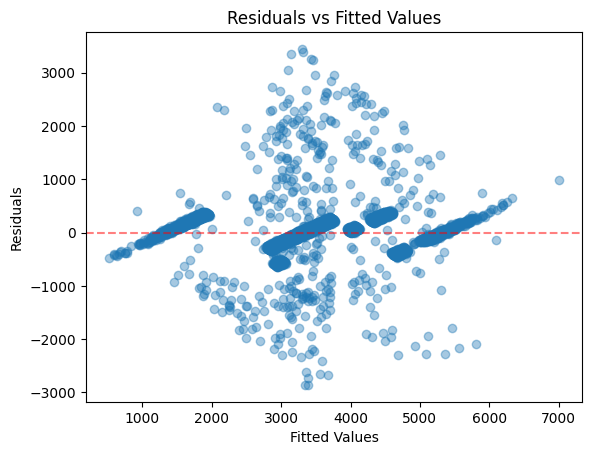

In [ ]:
plt.scatter(model.fittedvalues, model.resid, alpha = 0.4)  #model.predict (X_train)
plt.axhline(0, color = 'r', alpha = 0.5, linestyle = '--')
plt.xlabel ('Fitted Values')
plt.ylabel ('Residuals')
plt.title('Residuals vs Fitted Values')

In [ ]:
import statsmodels.stats.api as sms

result = sms.het_goldfeldquandt(y_train, X_train)

In [ ]:
result[1] # > 0.05 : signifigance level.... so we shall not reject the null hyp.  meaning the resid is homoskedastic ... model passes

0.9975360290322633

In [ ]:
# Linearty of Vaiables
#Residual vs Fitted Values

<Axes: ylabel='Count'>

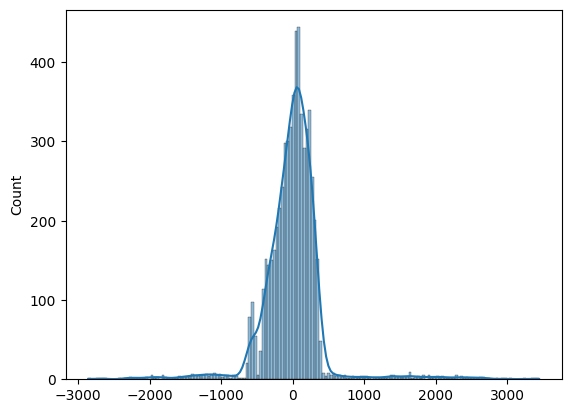

In [ ]:
# Nomality of error

sns.histplot(model.resid, kde = True)

((array([-3.68803911, -3.45585563, -3.3280438 , ...,  3.3280438 ,
          3.45585563,  3.68803911]),
  array([-2858.80667317, -2855.75715672, -2720.43991772, ...,
          3349.77829046,  3380.48819924,  3445.82022668])),
 (395.06449345074935, 9.051197491567761e-12, 0.8726731649750372))

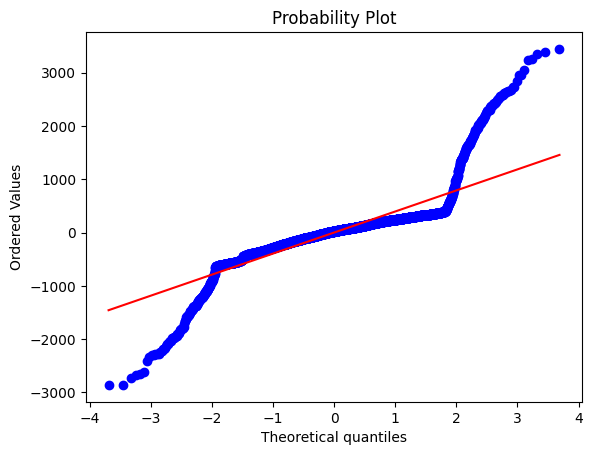

In [ ]:
import pylab
from scipy import stats

stats.probplot(model.resid, dist = 'norm', plot = pylab)

In [ ]:
# cross validation time

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
model2 = LinearRegression()

cross_val_score(model2, X_train, y_train, cv = 10, scoring='neg_mean_absolute_percentage_error')

array([-0.10210171, -0.09687453, -0.09543782, -0.10189549, -0.09522334,
       -0.130123  , -0.0918403 , -0.09145077, -0.10461082, -0.09857444])

In [ ]:
mae_ = cross_val_score(model2, X_train, y_train, cv = 10, scoring='neg_mean_absolute_percentage_error')

In [ ]:
np.mean(-mae_)

0.10081322416336747

In [ ]:
np.mean(-mae_) - 3 * np.std(mae_), np.mean(-mae_) + 3 * np.std(mae_)

(0.06899126350827894, 0.132635184818456)

In [ ]:
np.mean(cross_val_score(model2, X_test, y_test, cv = 10, scoring='neg_mean_absolute_percentage_error'))

-0.09500568776876486

# **Conclusion: See Executive Summary **